In [1]:
%%shell
wget 'https://drive.google.com/uc?export=view&id=1JicON-YHoAlbX35in4c9wcLdFmrkZdi9' -O video.mp4
ls -sh

--2023-08-25 19:35:25--  https://drive.google.com/uc?export=view&id=1JicON-YHoAlbX35in4c9wcLdFmrkZdi9
Resolving drive.google.com (drive.google.com)... 108.177.126.100, 108.177.126.138, 108.177.126.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.126.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v5or2jd287qsfnpic8n579vnkuumnajb/1692992100000/16848862265445619282/*/1JicON-YHoAlbX35in4c9wcLdFmrkZdi9?e=view&uuid=622c78b5-84cd-4f35-bf34-22e126a66c6e [following]
--2023-08-25 19:35:26--  https://doc-0s-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v5or2jd287qsfnpic8n579vnkuumnajb/1692992100000/16848862265445619282/*/1JicON-YHoAlbX35in4c9wcLdFmrkZdi9?e=view&uuid=622c78b5-84cd-4f35-bf34-22e126a66c6e
Resolving doc-0s-4g-docs.googleusercontent.com (doc-0s-4g-docs.googleusercontent.com)... 74.125.128.132, 2a00:1450:401

In [40]:
#pip install opencv-python
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike
from IPython.display import Video
from ipywidgets import IntSlider, interact
from pathlib import Path

In [3]:
cap = cv2.VideoCapture("video.mp4")

In [4]:
cap

< cv2.VideoCapture 0x7d3308c43630>

In [5]:
cap.isOpened()

True

In [6]:
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [7]:
frame.shape

(240, 320, 3)

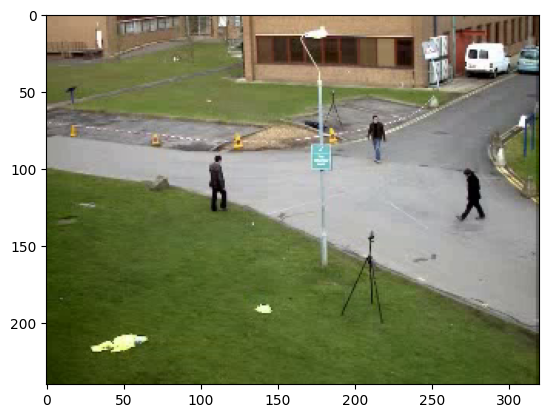

In [8]:
fig, ax = plt.subplots()
ax.imshow(frame)

In [9]:
slider = IntSlider()
slider

IntSlider(value=0)

In [10]:
def load_video(filename: str) -> ArrayLike:
    cap = cv2.VideoCapture(filename)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)[np.newaxis, ...]
            frames.append(frame)
        else:
            break
    cap.release()
    frames = np.concatenate(frames, axis=0)
    return frames

In [11]:
frames = load_video("video.mp4")

In [12]:
frames.shape

(350, 240, 320, 3)

In [13]:
def show_frame(frame_id: int):
    fig, ax = plt.subplots()
    ax.imshow(frames[frame_id])
    ax.axis("off")

interactive(children=(IntSlider(value=0, description='frame_id', max=350), Output()), _dom_classes=('widget-in…

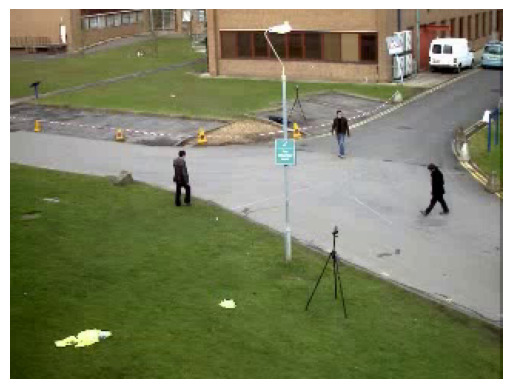

In [14]:
interact(
    show_frame,
    frame_id = IntSlider(value=0, min=0, max=frames.shape[0])
);

In [15]:
from sklearn.decomposition import PCA

In [16]:
frames_gray = frames.mean(axis=-1)
frames_gray.shape

(350, 240, 320)

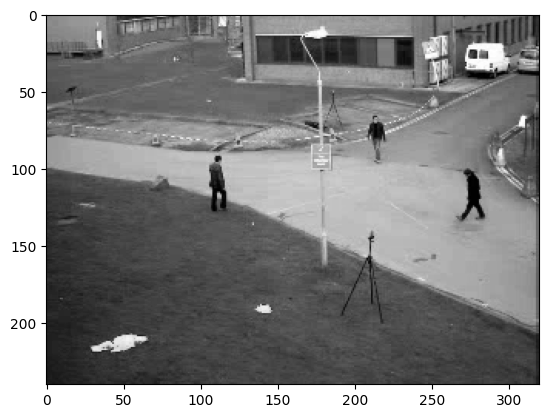

In [17]:
fig, ax = plt.subplots()
ax.imshow(frames_gray[0], cmap="gray")

In [18]:
frames_flatten = frames_gray.reshape(350, -1)

[Text(0.5, 0, 'pixel')]

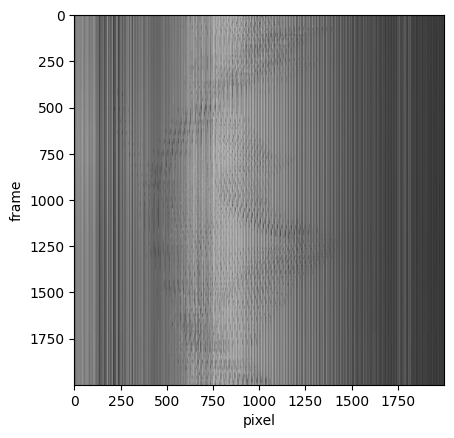

In [20]:
fig, ax = plt.subplots()
frames_show = cv2.resize(frames_flatten, (2000, 2000))
ax.imshow(frames_show, cmap="gray")
ax.set(ylabel="frame", xlabel="pixel")

In [21]:
model = PCA().fit(frames_flatten)

In [22]:
model.explained_variance_

array([1.16667397e+06, 8.13673353e+05, 7.03507229e+05, 5.69622105e+05,
       5.30227701e+05, 5.11694035e+05, 4.67561190e+05, 4.46075070e+05,
       4.19330791e+05, 3.66797244e+05, 3.58077641e+05, 3.12529775e+05,
       3.10704731e+05, 2.99569065e+05, 2.89669996e+05, 2.76037430e+05,
       2.65328315e+05, 2.52311530e+05, 2.41421414e+05, 2.26233875e+05,
       2.20646123e+05, 2.13940740e+05, 2.02110395e+05, 1.90448920e+05,
       1.81295391e+05, 1.80405035e+05, 1.68801399e+05, 1.63900748e+05,
       1.57876066e+05, 1.54500217e+05, 1.52805930e+05, 1.45665463e+05,
       1.38789238e+05, 1.36562030e+05, 1.31867919e+05, 1.29517696e+05,
       1.25687879e+05, 1.14911069e+05, 1.13160485e+05, 1.10421361e+05,
       1.06190915e+05, 1.00976818e+05, 9.75832861e+04, 9.62933928e+04,
       9.33684619e+04, 9.05097342e+04, 8.82616472e+04, 8.47758530e+04,
       8.41445371e+04, 8.12492027e+04, 8.01247902e+04, 7.69881205e+04,
       7.33394928e+04, 7.20971385e+04, 7.04993147e+04, 6.77848926e+04,
      

In [23]:
model.components_

array([[ 2.00180516e-03,  2.20276094e-03,  2.48925541e-03, ...,
        -3.11062279e-04, -6.77425292e-05,  1.63658084e-04],
       [ 1.17241162e-03,  9.12555662e-04,  7.52771835e-04, ...,
        -1.26590561e-04, -6.20902771e-04, -6.19734014e-04],
       [-3.44388011e-04,  2.10819869e-04,  5.12294750e-04, ...,
         1.00789581e-04, -1.42618415e-04, -2.70158695e-04],
       ...,
       [ 3.74818782e-05,  4.64488409e-05, -1.01337310e-05, ...,
         1.18776035e-05,  5.67981480e-05,  4.96823277e-05],
       [ 4.87948267e-04,  5.25490076e-04, -6.00140785e-04, ...,
         8.84708775e-05,  7.90997306e-05,  5.22499124e-05],
       [-3.41998895e-03, -4.69301822e-03, -1.40767495e-03, ...,
         8.26986123e-04,  1.80346952e-03,  1.33750310e-03]])

In [24]:
trans = model.transform(frames_flatten)

In [25]:
res = trans[:, 1:] @ model.components_[1:]
res.shape

(350, 76800)

In [26]:
res = res.reshape(-1, 240, 320)
res.shape

(350, 240, 320)

In [31]:
fg_frames = 255 * (res - res.min()) / (res.max() - res.min()) # (0, 255)
fg_frames = fg_frames.astype(np.uint8)
fg_frames.min(), fg_frames.max()

(0, 254)

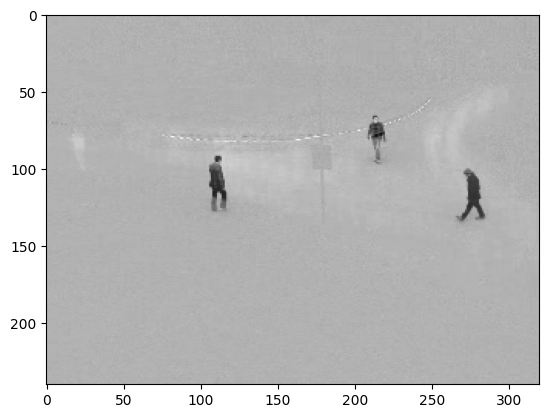

In [32]:
fig, ax = plt.subplots()
ax.imshow(fg_frames[0], cmap="gray")

In [37]:
writer = cv2.VideoWriter(
    "fg.mp4",
    cv2.VideoWriter_fourcc("M", "J", "P", "G"),
    20, (240, 320)
)
for frame in range(fg_frames.shape[0]):
    frame_rgb = np.concatenate([fg_frames[frame, ..., np.newaxis]], axis=-1)
    writer.write(frame_rgb)
writer.release()

In [38]:
!ls -sh

total 1.1M
4.0K fg.mp4  4.0K sample_data  1.1M video.mp4


In [41]:
path = Path(".") / "images"
path.mkdir()

In [46]:
str(path.resolve())

'/content/images'

In [47]:
for frame in range(fg_frames.shape[0]):
    frame_path = path / f"{frame}.png"
    cv2.imwrite(str(frame_path.resolve()), fg_frames[frame])

In [48]:
images = []
for p in path.glob("*.png"):
    images.append(imageio.imread(p))
imageio.mimsave("fg.gif", images)

<ipython-input-48-a45f44809c38>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(p))


In [49]:
!ls -sh

total 12M
 11M fg.gif  4.0K fg.mp4   12K images  4.0K sample_data  1.1M video.mp4


In [51]:
frames_gray = frames_gray.astype(np.uint8)

In [55]:
frames_gray

array([[[137, 137, 137, ...,  63,  55,  48],
        [137, 137, 137, ...,  29,  40,  42],
        [137, 137, 137, ...,  33,  46,  49],
        ...,
        [ 25,  26,  26, ...,  53,  34,  31],
        [ 27,  26,  26, ...,  55,  37,  33],
        [ 31,  30,  28, ...,  53,  34,  31]],

       [[136, 136, 136, ...,  63,  55,  48],
        [136, 136, 136, ...,  29,  40,  42],
        [136, 136, 136, ...,  33,  46,  49],
        ...,
        [ 25,  26,  26, ...,  53,  34,  31],
        [ 27,  26,  26, ...,  55,  37,  33],
        [ 31,  30,  28, ...,  53,  34,  31]],

       [[136, 136, 136, ...,  63,  55,  48],
        [136, 136, 136, ...,  29,  40,  42],
        [136, 136, 136, ...,  33,  46,  49],
        ...,
        [ 25,  26,  26, ...,  53,  34,  31],
        [ 27,  26,  26, ...,  55,  37,  33],
        [ 32,  31,  28, ...,  53,  34,  31]],

       ...,

       [[137, 137, 137, ...,  57,  48,  49],
        [137, 137, 137, ...,  23,  42,  53],
        [137, 137, 137, ...,  30,  52,  54

In [54]:
fg_frames

array([[[139, 139, 138, ..., 139, 142, 138],
        [139, 139, 138, ..., 138, 134, 134],
        [139, 139, 138, ..., 137, 134, 136],
        ...,
        [138, 138, 137, ..., 140, 140, 140],
        [140, 139, 139, ..., 137, 138, 137],
        [141, 140, 139, ..., 139, 137, 137]],

       [[138, 138, 138, ..., 139, 142, 138],
        [138, 138, 138, ..., 138, 135, 134],
        [138, 138, 138, ..., 137, 134, 136],
        ...,
        [138, 138, 137, ..., 140, 140, 140],
        [140, 139, 139, ..., 137, 138, 137],
        [141, 140, 139, ..., 139, 137, 137]],

       [[138, 138, 138, ..., 139, 142, 138],
        [138, 138, 138, ..., 138, 135, 134],
        [138, 138, 138, ..., 137, 134, 136],
        ...,
        [138, 138, 137, ..., 140, 140, 140],
        [140, 139, 139, ..., 137, 138, 137],
        [141, 140, 139, ..., 139, 137, 137]],

       ...,

       [[137, 137, 137, ..., 135, 137, 138],
        [137, 137, 137, ..., 134, 134, 140],
        [137, 137, 137, ..., 135, 136, 138

In [67]:
res = trans[:, :10] @ model.components_[:10]

In [68]:
res.shape

(350, 76800)

In [69]:
res = res.reshape(-1, 240, 320)

In [70]:
bg_frames = 255 * (res - res.min()) / (res.max() - res.min()) # (0, 255)
bg_frames = bg_frames.astype(np.uint8)
bg_frames.min(), bg_frames.max()

(0, 254)

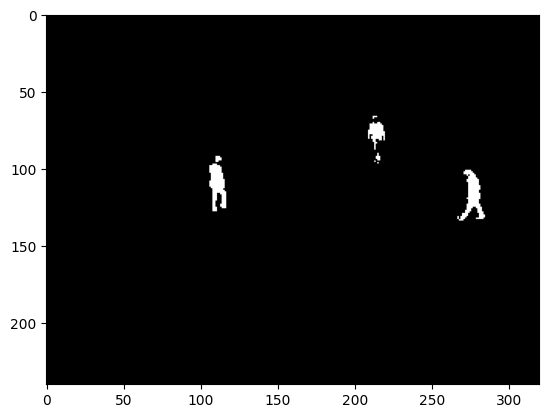

In [77]:
fig, ax = plt.subplots()
ax.imshow(fg_frames[0] < 100, cmap="gray")

array([[[139, 139, 138, ..., 139, 142, 138],
        [139, 139, 138, ..., 138, 134, 134],
        [139, 139, 138, ..., 137, 134, 136],
        ...,
        [138, 138, 137, ..., 140, 140, 140],
        [140, 139, 139, ..., 137, 138, 137],
        [141, 140, 139, ..., 139, 137, 137]],

       [[138, 138, 138, ..., 139, 142, 138],
        [138, 138, 138, ..., 138, 135, 134],
        [138, 138, 138, ..., 137, 134, 136],
        ...,
        [138, 138, 137, ..., 140, 140, 140],
        [140, 139, 139, ..., 137, 138, 137],
        [141, 140, 139, ..., 139, 137, 137]],

       [[138, 138, 138, ..., 139, 142, 138],
        [138, 138, 138, ..., 138, 135, 134],
        [138, 138, 138, ..., 137, 134, 136],
        ...,
        [138, 138, 137, ..., 140, 140, 140],
        [140, 139, 139, ..., 137, 138, 137],
        [141, 140, 139, ..., 139, 137, 137]],

       ...,

       [[137, 137, 137, ..., 135, 137, 138],
        [137, 137, 137, ..., 134, 134, 140],
        [137, 137, 137, ..., 135, 136, 138

In [78]:
from sklearn.datasets import fetch_olivetti_faces

In [79]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [80]:
imgs = data["images"]

In [81]:
imgs.shape

(400, 64, 64)

(-0.5, 63.5, 63.5, -0.5)

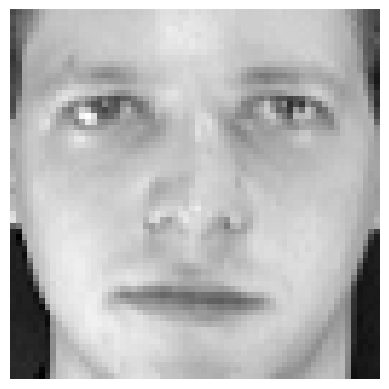

In [82]:
fig, ax = plt.subplots()
ax.imshow(imgs[0], cmap="gray")
ax.axis("off")

In [83]:
imgs_flatten = imgs.reshape(400, -1)

In [84]:
model = PCA().fit(imgs_flatten)

In [85]:
model.components_.shape

(400, 4096)

In [86]:
eigenfaces = model.components_.reshape(400, 64, 64)

(-0.5, 63.5, 63.5, -0.5)

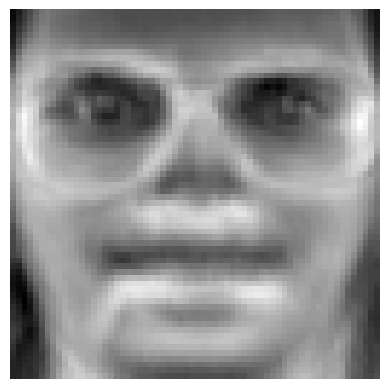

In [97]:
fig, ax = plt.subplots()
ax.imshow(eigenfaces[6], cmap="gray")
ax.axis("off")

In [114]:
img_trans = model.transform(imgs_flatten[[0]])

In [115]:
img_trans.shape

(1, 400)

In [116]:
img_trans.min(), img_trans.max()

(-6.432611, 2.5643919)

In [117]:
img_trans[0, 6] *= 10

In [118]:
img_r = model.inverse_transform(img_trans).reshape(64, 64)

(-0.5, 63.5, 63.5, -0.5)

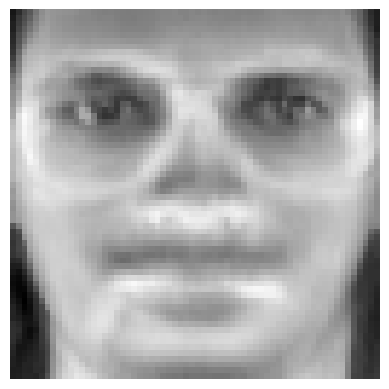

In [119]:
fig, ax = plt.subplots()
ax.imshow(img_r, cmap="gray")
ax.axis("off")